In [9]:
#Learn Python

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Memanggil Data

In [11]:
df = pd.read_csv('audi.csv')

#Deskripsi DataSet

In [12]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


<Axes: >

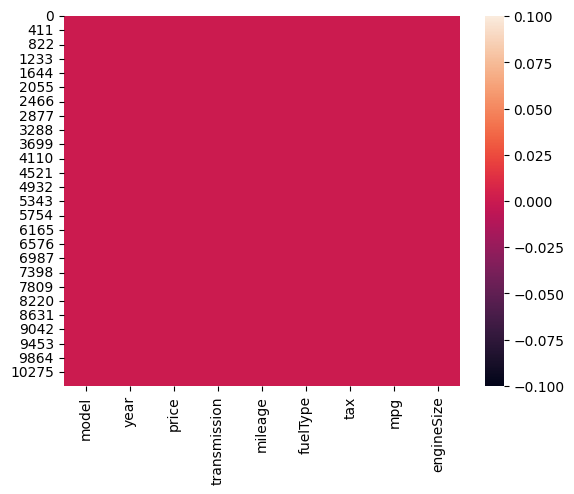

In [14]:
sns.heatmap(df.isnull())

In [15]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


#Visualisasi Data


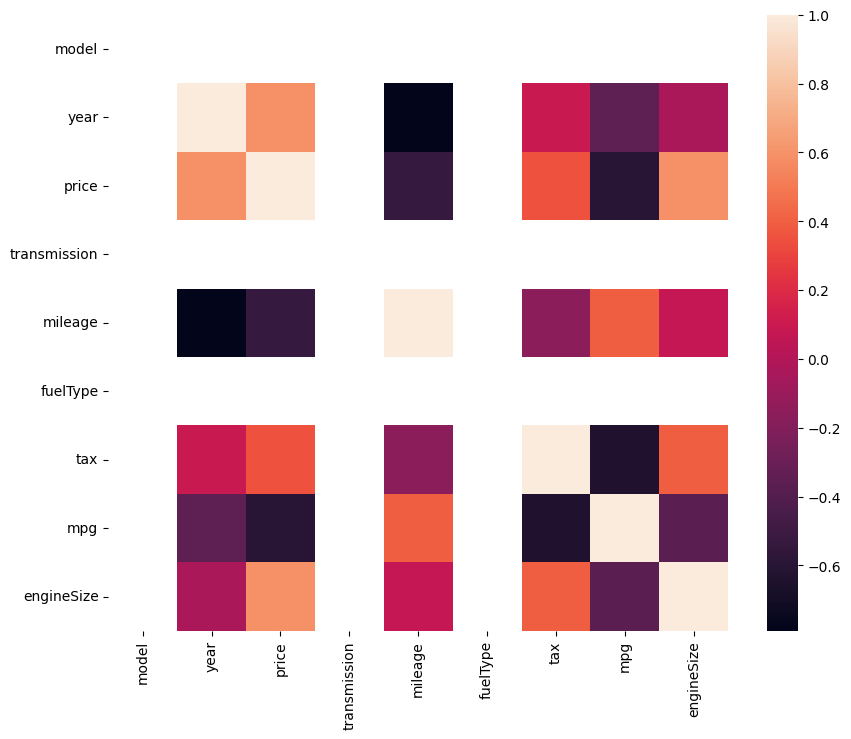

In [28]:
# Identify and handle non-numeric values
non_numeric_cols = df.select_dtypes(exclude=np.number).columns
df_cleaned = df.copy()
df_cleaned[non_numeric_cols] = df_cleaned[non_numeric_cols].apply(pd.to_numeric, errors='coerce')

# Create correlation matrix and plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=False)
plt.show()

#Jumlah Mobil berdasarkan model

In [29]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()
models = models.rename(columns={'tax': 'numberOfCars'})

<Axes: xlabel='model', ylabel='numberOfCars'>

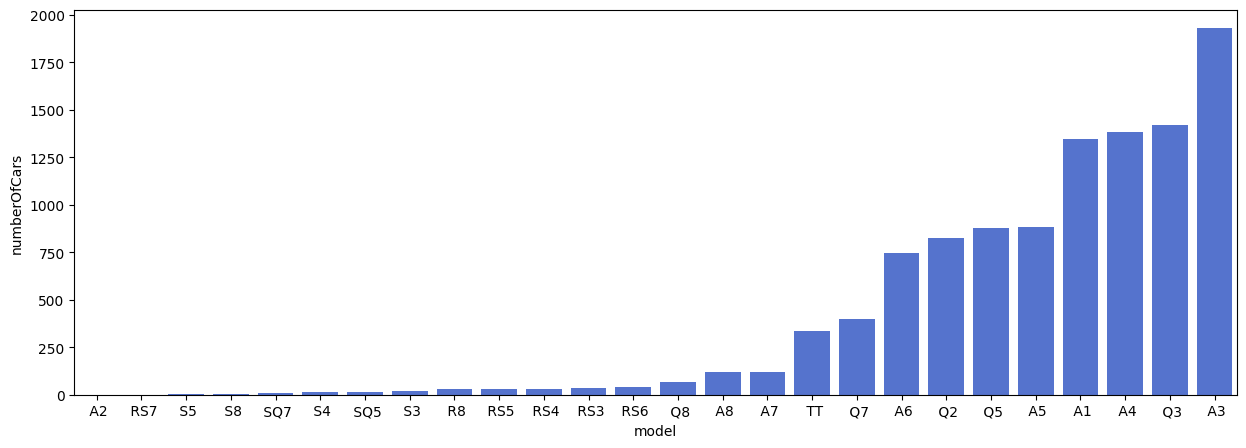

In [30]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'], color='royalBlue')

#Distribusi Mileage

C:\Users\dwiag\AppData\Local\Temp\ipykernel_1460\148899218.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

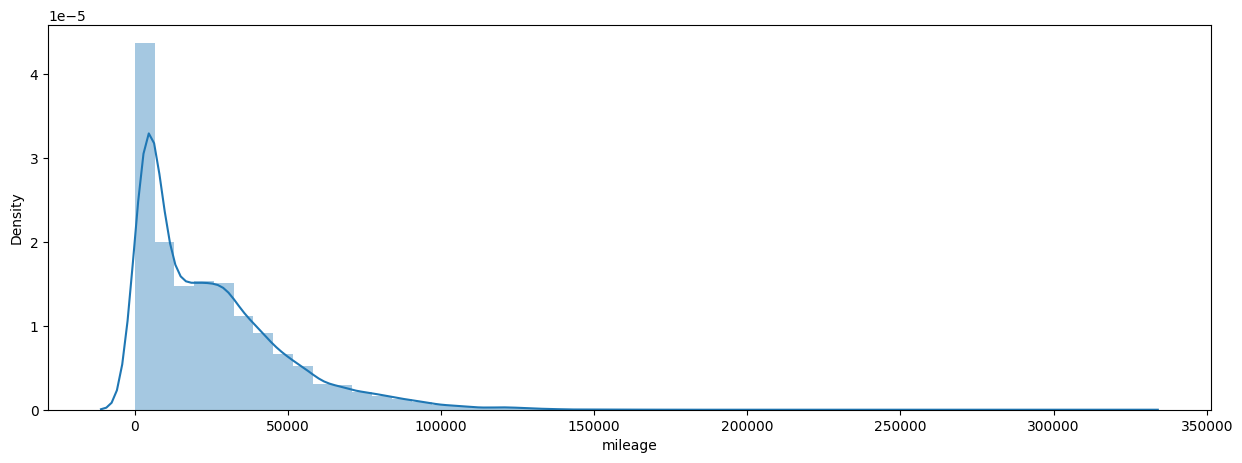

In [36]:
plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

#Distribusi Harga Mobil

C:\Users\dwiag\AppData\Local\Temp\ipykernel_1460\3048279456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

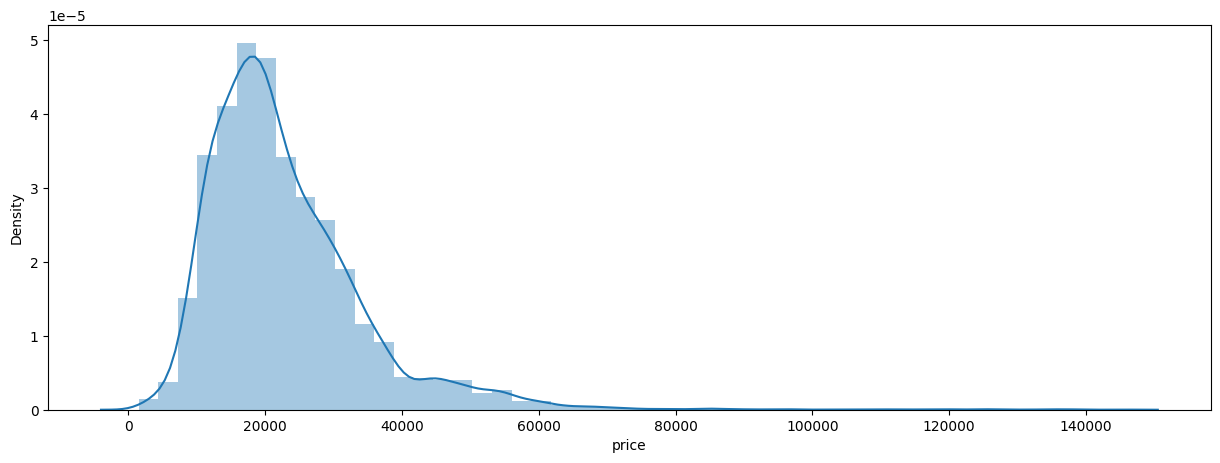

In [38]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

# Seleksi Fitur


In [39]:
features = ['year', 'mileage','tax','mpg','engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((10668, 5), (10668,))

# Split data training dan data testing

In [41]:
from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train = train_test_split(x,y,random_state=70)
y_test.shape

(8001,)

# Membuat Model Regresi Linear

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [43]:
score = lr.score(x_test,y_test)
print('Akurasi Model Regresi Linear = ', score)

Akurasi Model Regresi Linear =  0.7787677449883407


# Membuat Inputan Model Regresi Linear

In [45]:
#Year=2019, mileage=5000, tax=145, mpg=30.2, engineSize=2

input_data = np.array([[2019,5000,145,30.2,2]])
prediction = lr.predict(input_data)
print('Estimasi Harga Mobil Bekas Dalam EUR = ', prediction)

Estimasi Harga Mobil Bekas Dalam EUR =  [33297.62287735]


C:\Users\dwiag\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Save Model 

In [47]:
import pickle

filename = 'estimasi_harga_mobil_bekas.sav'
pickle.dump(lr,open(filename,'wb'))

In [9]:
import streamlit